<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Univ.Project/blob/main/%EC%83%81%EA%B6%8C%EC%83%81%EC%83%9D/%EC%83%81%EA%B6%8C%EC%83%81%EC%83%9D_%EA%B3%B5%EA%B3%B5API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python(Colab) 공공데이터 포털 API 확인 및 Data로드

In [1]:
!pip install requests

In [2]:
!pip install xmltodict

In [5]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 46.0 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [6]:
!pip install earthpy

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 19.3 MB 45 kB/s 


### 행정구역 단위 상권조회

In [3]:
import requests # pycharm에선 alt+enter로 확인후 requests미설치일경우 install package 설치
import xmltodict
import json

In [4]:
### 서울특별시(시도코드ctprvnCd == 11) 상권 Data 
### 상권명, 위치, 면적

key = "e%2FnGIb5E0R%2FuR0ywYa1QC6UIhB%2FDPkqntCeOgWbyGkNMNy%2BQejM%2BYjy4ub9kfHxt6dEE3Vf%2BUWZ8koFmWBqGcg%3D%3D" # API KEY(일반 인코딩)
url = "http://apis.data.go.kr/B553077/api/open/sdsc2/storeZoneInAdmi?divId=ctprvnCd&key=11&serviceKey={}".format(key) # URL Encoder

content = requests.get(url).content # resultcode 가 00으로 제대로 뜸. ※API는 신청하고 약 30분? 지난 후 호출 가능해짐
dict = xmltodict.parse(content)
print(dict['response']['body']['items']) # 실질 데이터

# 파일 저장할 때 jsonString으로 해 줄 수 잇따~
jsonString = json.dumps(dict['response']['body']['items'], ensure_ascii=False) # 실질 데이터 json으로 변환
jsonObj = json.loads(jsonString)
print(len(jsonObj['item']))

for item in jsonObj['item']:
    print(item)

OrderedDict([('item', [OrderedDict([('trarNo', '9213'), ('mainTrarNm', '가리봉시장(구로디지털오거리)'), ('ctprvnCd', '11'), ('ctprvnNm', '서울특별시'), ('signguCd', '11530'), ('signguNm', '구로구'), ('trarArea', '26424'), ('coordNum', '24'), ('coords', 'MULTIPOLYGON (((126.888699631543 37.4830419883374, 126.888699621396 37.4830487458473, 126.888476799576 37.4827309297126, 126.888310283324 37.4825640849885, 126.887708690072 37.4822571668473, 126.887703122284 37.4822008488199, 126.888170396211 37.4816088881157, 126.888660281542 37.4810124420573, 126.888966154484 37.4806050296131, 126.889167198791 37.4803619498965, 126.88923220777 37.4803620116157, 126.889322493595 37.4804702176362, 126.889424216683 37.4804905866299, 126.889658761052 37.4805268487472, 126.889819773507 37.4805923235944, 126.889694824803 37.4809841418507, 126.889569448547 37.4816620279508, 126.889447259443 37.4820966461151, 126.889257881082 37.4820964665627, 126.889254993956 37.4821370089474, 126.889232189714 37.4822653801974, 126.889025433422 

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
import geopandas as gpd
import earthpy as et

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

store_df = pd.DataFrame(jsonObj['item'])
store_df.head(10)

,trarNo,mainTrarNm,ctprvnCd,ctprvnNm,signguCd,signguNm,trarArea,coordNum,coords,stdrDt
0,9213,가리봉시장(구로디지털오거리),11,서울특별시,11530,구로구,26424,24,MULTIPOLYGON (((126.888699631543 37.4830419883...,2021-06-30
1,9221,구로중앙유통단지,11,서울특별시,11530,구로구,104600,43,MULTIPOLYGON (((126.873773094011 37.5041208594...,2021-06-30
2,9222,대림역,11,서울특별시,11530,구로구,20916,21,MULTIPOLYGON (((126.889410453306 37.4953953971...,2021-06-30
3,9223,신도림역,11,서울특별시,11530,구로구,154677,53,MULTIPOLYGON (((126.888977556373 37.5107232411...,2021-06-30
4,9224,오류동,11,서울특별시,11530,구로구,84263,51,MULTIPOLYGON (((126.842502847581 37.4973148187...,2021-06-30
5,9216,개봉동 현대아파트,11,서울특별시,11530,구로구,84254,36,MULTIPOLYGON (((126.854215688406 37.4915072736...,2021-06-30
6,9217,구로기계공구상_1,11,서울특별시,11530,구로구,51560,32,MULTIPOLYGON (((126.876502138769 37.5055907865...,2021-06-30
7,9218,구로기계공구상_2,11,서울특별시,11530,구로구,32914,23,MULTIPOLYGON (((126.877164096282 37.5053865071...,2021-06-30
8,9219,디지털단지오거리,11,서울특별시,11530,구로구,27614,26,MULTIPOLYGON (((126.887236296692 37.4824932246...,2021-06-30
9,9220,구로역,11,서울특별시,11530,구로구,16203,24,MULTIPOLYGON (((126.882515535525 37.5023714124...,2021-06-30


In [21]:
store_df.coords[0]

'MULTIPOLYGON (((126.888699631543 37.4830419883374, 126.888699621396 37.4830487458473, 126.888476799576 37.4827309297126, 126.888310283324 37.4825640849885, 126.887708690072 37.4822571668473, 126.887703122284 37.4822008488199, 126.888170396211 37.4816088881157, 126.888660281542 37.4810124420573, 126.888966154484 37.4806050296131, 126.889167198791 37.4803619498965, 126.88923220777 37.4803620116157, 126.889322493595 37.4804702176362, 126.889424216683 37.4804905866299, 126.889658761052 37.4805268487472, 126.889819773507 37.4805923235944, 126.889694824803 37.4809841418507, 126.889569448547 37.4816620279508, 126.889447259443 37.4820966461151, 126.889257881082 37.4820964665627, 126.889254993956 37.4821370089474, 126.889232189714 37.4822653801974, 126.889025433422 37.4825444946196, 126.88882159001 37.4827650462679, 126.888699631543 37.4830419883374)))'

#### Shapely, Geometry 막간 학습

In [14]:
!pip3 install shapely

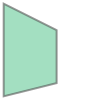

In [24]:
from shapely.geometry import Polygon

# polygon 생성하기(튜플)

p1 = Polygon(((1,2),(5,3),(5,7),(1,9),(1,2)))
p1

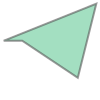

In [23]:
p2 = Polygon(((6,6),(7,6),(10,4),(11,8),(6,6)))
p2

> Point 생성하기(좌표값) 

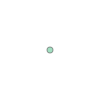

In [26]:
from shapely.geometry import Point
point = Point(2.0, 2.0)
point

> Line 생성하기 

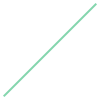

In [27]:
from shapely.geometry import LineString
line = LineString([(0,0), (10,10)])
line

> Linear Ring 생성하기 

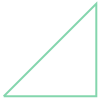

In [28]:
from shapely.geometry.polygon import LinearRing
ring = LinearRing([(0,0), (3,3), (3,0)])
ring

> MultiPoint 생성하기 

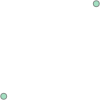

In [29]:
from shapely.geometry import MultiPoint
points = MultiPoint([(0,0), (3,3)])
points

> MultiLine 생성하기 

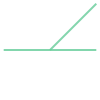

In [31]:
from shapely.geometry import MultiLineString
coords = MultiLineString([((0,0), (1,1)),((-1,0), (1,0))])
coords

> MultiPolygon 생성하기 

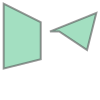

In [32]:
from shapely.geometry import MultiPolygon
polygons = MultiPolygon([p1,p2])
polygons

In [33]:
# p1 = Polygon(((1,2),(5,3),(5,7),(1,9),(1,2)))

# 면적 구하기
print(p1.area)
# 경계 구하기
print(p1.bounds)
# 길이 구하기
print(p1.length)
# geometry Type 구하기
print(p1.geom_type)

22.0
(1.0, 2.0, 5.0, 9.0)
19.59524158061724
Polygon


### 상권내 상가업소 조회 

In [141]:
num
# pd.DataFrame(jsonObj['item']).trarNO

'9264'

In [ ]:
total_stores = pd.DataFrame()
for num in store_df.trarNo:
  request = f'http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInArea?key={num}&serviceKey={key}'
  con = requests.get(request).content
  dict = xmltodict.parse(con)
  # 파일 저장할 때 jsonString으로 해 줄 수 잇따~
  jsonString = json.dumps(dict['response']['body']['items'], ensure_ascii=False) # 실질 데이터 json으로 변환
  jsonObj = json.loads(jsonString)
  df = pd.DataFrame(jsonObj['item'])
  df['trarNo'] = num
  total_stores = pd.concat([total_stores,df],ignore_index=True)

In [ ]:
total_stores

In [171]:
report1 = pd.DataFrame(total_stores.groupby('ksicNm')['bizesId'].count())
report1 ### 서울내 세부 업종별 갯수

,bizesId
ksicNm,
가구 소매업,17
가방 및 기타 가죽제품 소매업,10
가전제품 소매업,46
가전제품 수리업,4
가정용 가스연료 소매업,1
...,...
"피자, 햄버거, 샌드위치 및 유사 음식점업",26
한복 소매업,5
한식 음식점업,1022


In [172]:
!pip install folium

In [186]:
import folium
from folium.plugins import MarkerCluster

list1=[]
list2=[]
marker_cluster = MarkerCluster().add_to(map)
for a in total_stores.index:
    folium.Marker(location = [total_stores.loc[a,"lat"],total_stores.loc[a,"lon"]],
                  popup=total_stores.loc[a,"ksicNm"]).add_to(marker_cluster)
    list1.append(total_stores.loc[a,"lat"]) # 위도
    list2.append(total_stores.loc[a,"lon"]) # 경도

map

RecursionError: ignored

In [188]:
total_stores.loc[0,"lat"]

0    37.4819465159524
0    37.5020209898045
0    37.4955691263463
0    37.5080580382841
0    37.4959442045786
           ...       
0     37.562521418567
0    37.5606106221912
0     37.564068422036
0    37.5603624982997
0    37.5598971216855
Name: lat, Length: 254, dtype: object

In [192]:
total_stores["lat"]

0     37.4819465159524
1     37.4813968473914
2     37.4817475960476
3     37.4817193993952
4     37.4821109887212
            ...       
15    37.5595518167192
16    37.5598027957056
17    37.5604449471348
18    37.5601113273014
19    37.5595518167192
Name: lat, Length: 5063, dtype: object